In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

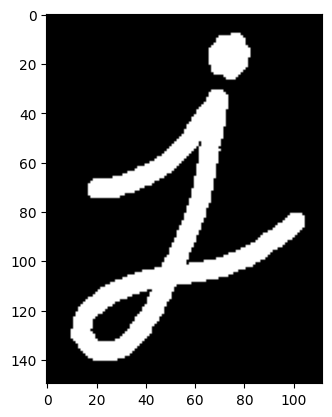

In [6]:
img = cv.imread('bw_text.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

greyscale_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.subplot
plt.imshow(greyscale_img, cmap='grey')

1) **Input**: must be a binary image (such as output of edge detection with Canny, where edges are white and the rest are black)  
	
2) **Retrieval Mode**: 
+  This where contour are retrieved and organized.
+ `cv.RETR_LIST`: Retrieves all contours in the image but doesn't organize them (i.e. no parent-child relationship). Each contour are independent.
+ Other `cv.RETR_`: `cv.RETR_EXTERNAL` (retrieves only outer contours), `cs.RETR_TREE` (retrieves and organizes them into a hierarchy) and `cv.RETR_CCOMP` (retrieves contours and organizes them into 2 levels: external and internal)
	
3) **Approximation Method**: approximate contours (note: contours are store in a contour list)
+ `cv.CHAIN_APPROX_SIMPLE`: compress horizontal and vertical and diagnol segments, only storing their enpoints. Ex: if there a line, only 2 of its endpoints get stored -> Reduces the number of points representing the contour, simplifying it without losing the shape.
+ `cv.CHAIN_APPROX_NONE`: retrieves all contour points without purely.  

note: can decrease contour by blurring image

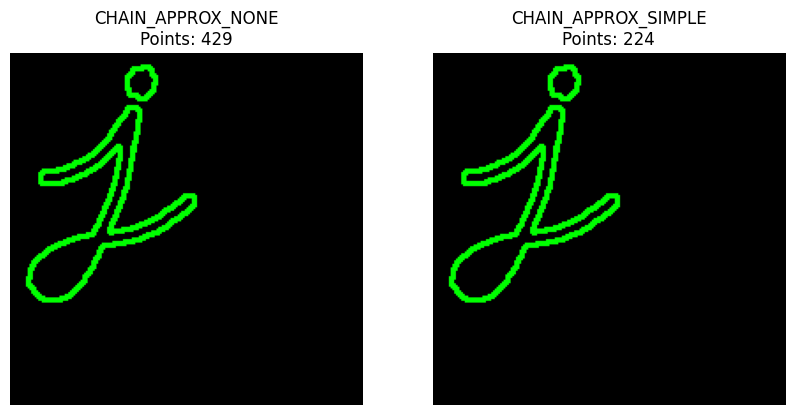

In [5]:
# 2) Find contours using CHAIN_APPROX_NONE (keeps all points)
contours_none, _ = cv.findContours(greyscale_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# 3) Find contours using CHAIN_APPROX_SIMPLE (removes redundant points)
contours_simple, _ = cv.findContours(greyscale_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# 4) Draw contours on a blank image
image_none = np.zeros((200, 200, 3), dtype=np.uint8)
image_simple = np.zeros((200, 200, 3), dtype=np.uint8)

cv.drawContours(image_none, contours_none, -1, (0, 255, 0), 2)
cv.drawContours(image_simple, contours_simple, -1, (0, 255, 0), 2)

# 5) Count the number of contour points
num_points_none = len(contours_none[0])  # All points (detailed)
num_points_simple = len(contours_simple[0])  # Only necessary points

# 6) Display results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_none, cmap='gray')
axes[0].set_title(f"CHAIN_APPROX_NONE\nPoints: {num_points_none}")
axes[0].axis('off')

axes[1].imshow(image_simple, cmap='gray')
axes[1].set_title(f"CHAIN_APPROX_SIMPLE\nPoints: {num_points_simple}")
axes[1].axis('off')

plt.show()